# 프로젝트 : 가위바위보 분류기 만들기

가위바위보 분류기를 만들어보자!

## 1. 데이터 준비

### 데이터 만들기

가위, 바위, 보 이미지 각각 100장씩 만들어 학습시킨 모델을 만들자. 

![img](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FclioHn%2FbtqANDPo9uw%2FbS1Gx3PR4NMb1DoKALyDI1%2Fimg.png)

300장의 이미지를 쉽게 만들어주는 **구글의 Teachable Machine**을 사용해보자. 여기서는 웹캠이 있는 컴퓨터 환경이 필요하다. 아래 링크를 클릭!

<https://teachablemachine.withgoogle.com>

만드는 순서는 아래와 같다.

1. Teachable machine 사이트 이동
2. Get Started 버튼 클릭
3. Image Project 선택
4. Web Cam을 구동해 클래스별 이미지 데이터를 직접 촬영
    - 먼저 가위만 100장 찍는다. 
    - 여러 각도, 여러 크기, 여러 장소에서 촬영한다.
    - 100장을 촬영했으면 우측 상단 메뉴 아이콘 -> Download Samples 클릭
    - 가위 이미지 100장을 모두 저장했다면 바위 및 보도 같은 과정을 반복한다.
    
다운로드 받은 이미지는 **224x224**의 크기를 갖는다. 우리는 Mnist와 동일한 28x28 사이즈로 변경해 사용할 것이다.    

    
### 디렉토리 만들기

해당 작업할 `ipynb`파일이 있는 위치에 `/data` 폴더를 생성한다. 이 디렉토리의 하위 디렉토리로 `/data/train`, `/data/test`를 생성해 주자.

```bash
$ mkdir data
$ cd data
$ mkdir train
$ mkdir test
```

### 데이터 불러오기 + Resize 하기

Mnist와 마찬가지로 이 가위바위보의 이미지도 28x28이 되도록 만들어주자. 

먼저 PIL 라이브러리가 없는 경우 아래 명령어를 통해 설치하자.


In [73]:
#PIL 라이브러리가 설치되어있지 않다면 설치
!pip install pillow
!ls

2020-07-28-Fundamental1.md  Mnist-practice.ipynb
data			    Rock-Scissor-Paper.ipynb


설치를 완료했으면 아래와 같이 Import를 진행해주자.

In [89]:
from PIL import Image
import os, glob
import numpy as np

이제 이미지를 불러와서 resize를 진행하자. 

먼저 가위 이미지부터 시작한다.

In [95]:
image_dir_path = os.path.dirname(os.path.abspath('__file__'))
image_dir_path += r'/data/'

#가위 이미지 불러오기
scissors_path = image_dir_path + r'/train/scissors'

images = glob.glob(scissors_path + '/*.jpg')

#파일마다 모두 112x112 사이즈로 바꾸어 저장
target_size = (112, 112)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, "JPEG")

마찬가지로 바위와 보의 이미지도 28x28로 만들어보자.

In [96]:
rock_path = image_dir_path + r'/train/rock'
rock_images = glob.glob(rock_path + '/*.jpg')
#파일마다 모두 28x28 사이즈로 바꾸어 저장
for img in rock_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, 'JPEG')
    
paper_path = image_dir_path + r'/train/paper'
paper_images = glob.glob(paper_path + '/*.jpg')
for img in paper_images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img, 'JPEG')

숫자 손글씨 인식기는 `mnist.load_data()`라는 함수로 데이터를 읽었다. 가위, 바위, 보 데이터를 읽을 수 있는 `load_data()` 함수를 만들어 이 코드가 가위인지, 바위인지, 보인지 알 수 있게 해주자.

`load_data()` 함수는 입력으로 이미지가 있는 폴더 위치를 받는다. 여기서는 `data` 폴더의 위치를 적어주면 된다. 또한 가위바위보의 경우에는 3개의 클래스, 즉, **가위 : 0, 바위 : 1, 보 : 2**로 라벨링이 된다.

In [97]:
# 가위 : 0, 바위 : 1, 보 :2
def load_data(img_path):
    number_of_data = 300
    img_size = 112
    color = 3
    
    # 이미지 데이터와 라벨 데이터를 담을 공간
    imgs = np.zeros(number_of_data * img_size *img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/scissors/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :]= img
        labels[idx] = 0
        idx = idx+1
    
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1
        idx = idx+1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2
        idx = idx+1
    
    print("학습 데이터 x_train의 개수는 ", idx, "입니다.")
    return imgs, labels

In [111]:
image_path = os.path.dirname(os.path.abspath('__file__'))
image_path += r'/data/train'

(x_train, y_train) = load_data(image_path)
x_train_norm = x_train/255.0

print("x_train shape : {}".format(x_train.shape))
print("y_train shape : {}".format(y_train.shape))

학습 데이터 x_train의 개수는  300 입니다.
x_train shape : (300, 112, 112, 3)
y_train shape : (300,)


라벨 :  0


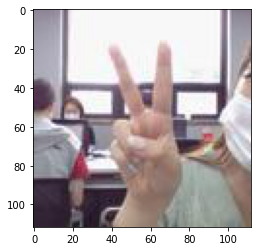

In [112]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨 : ', y_train[0])

## 딥러닝 네트워크 설계하기

이제 데이터 준비가 끝났다. 가위바위보를 인식하는 딥러닝 네트워크를 설계해보자.

In [119]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (112, 112, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

print("Model에 추가된 레이어의 개수 : ", len(model.layers))

Model에 추가된 레이어의 개수 :  7


In [117]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 48)                1038384   
_________________________________________________________________
dense_17 (Dense)             (None, 3)                

In [120]:
#x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3)
#x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3)

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 6ms/step - loss: 1.1711 - accuracy: 0.3933
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.8042 - accuracy: 0.7700
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4137 - accuracy: 0.8367
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1704 - accuracy: 0.9733
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0593 - accuracy: 0.9933
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000


training set의 validation으로 정확도를 체크한 결과 96퍼센트의 정확도가 나온다.

## 만든 모델이 잘 들어맞는지 테스트 하기

다른 사람과 비교하여 내 모델이 얼마나 잘 들어맞는지도 확인해보자.

먼저 테스트 데이터를 resize 하자.

In [103]:
def resize(image_path):
    target_size = (112, 112)
    
    for img in glob.glob(image_path + '/rock/*.jpg'):
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    for img in glob.glob(image_path + '/scissors/*.jpg'):
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    for img in glob.glob(image_path + '/paper/*.jpg'):
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

In [121]:
image_path = os.path.dirname(os.path.abspath('__file__'))
image_path += r'/data/test'
resize(image_path)

(x_test, y_test) = load_data(image_path)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습 데이터 x_train의 개수는  300 입니다.
x_test shape : (300, 112, 112, 3)
y_test shape : (300,)


In [107]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 758.7439 - accuracy: 0.3333
test_loss : 758.743896484375
test_accuracy : 0.3333333432674408


결과가 34퍼센트 나온다 ^^;;